Şıhmehmet Yıldız

511212133

yildizsih@itu.edu.tr

MAT555E - Homework 2

In [452]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.datasets import copper
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# HW2

## Question 1

For this question we are going to use the following dataset:

In [453]:
from statsmodels.datasets import copper

prices = copper.data.load_pandas()
prices['data']

,WORLDCONSUMPTION,COPPERPRICE,INCOMEINDEX,ALUMPRICE,INVENTORYINDEX,TIME
0,3173.0,26.56,0.70,19.76,0.98,1.0
1,3281.1,27.31,0.71,20.78,1.04,2.0
2,3135.7,32.95,0.72,22.55,1.05,3.0
3,3359.1,33.90,0.70,23.06,0.97,4.0
4,3755.1,42.70,0.74,24.93,1.02,5.0
5,3875.9,46.11,0.74,26.50,1.04,6.0
6,3905.7,31.70,0.74,27.24,0.98,7.0
7,3957.6,27.23,0.72,26.21,0.98,8.0
8,4279.1,32.89,0.75,26.09,1.03,9.0
9,4627.9,33.78,0.77,27.40,1.03,10.0


Write a regression model, and analyze it. Pick the smallest model and make sure that all variables you picked produce significant regression coefficients with resonable ANOVA profile.

# Answer 1
First, let's examine the description of the data.

The data shows the copper consumption over a 25-year period and the WORLD CONSUMPTION value is the target variable. The other 5 columns are the explanatory variables.

In [493]:
print(copper.DESCRLONG)

This data describes the world copper market from 1951 through 1975.  In an
example, in Gill, the outcome variable (of a 2 stage estimation) is the world
consumption of copper for the 25 years.  The explanatory variables are the
world consumption of copper in 1000 metric tons, the constant dollar adjusted
price of copper, the price of a substitute, aluminum, an index of real per
capita income base 1970, an annual measure of manufacturer inventory change,
and a time trend.



 Variable name definitions:
 
* WORLDCONSUMPTION - World consumption of copper (in 1000 metric tons)
* COPPERPRICE - Constant dollar adjusted price of copper
* INCOMEINDEX - An index of real per capita income (base 1970)
* ALUMPRICE - The price of aluminum
* INVENTORYINDEX - A measure of annual manufacturer inventory trend
* TIME - A time trend

First, let's assign the explanatory and target variables to a variable.

In [549]:
data = copper.load_pandas().data
y = data["WORLDCONSUMPTION"]
x = data[["COPPERPRICE", "INCOMEINDEX", "ALUMPRICE", "INVENTORYINDEX", "TIME"]]

Function for multi-regression,

In [550]:
def multiRegression(xs,ys):
    N,m = xs.shape
    
    ybar = ys.mean()
    ycent = ys - ybar
    Syy = np.dot(ycent,ycent)
    
    X = np.c_[np.ones(xs.shape[0]),xs]
    Xt = X.transpose()
    XXt = np.linalg.inv(np.matmul(Xt,X))
    beta = np.matmul(np.matmul(XXt,Xt),ys)
    
    resid = ys - np.matmul(beta,X.transpose())
    sigma2 = (1.0/(N-m))*np.dot(resid,resid)
    se = np.sqrt(sigma2*np.diag(XXt))
    R2 = 1.0 - sigma2/Syy
    
    return ({'beta': beta, 'R2': R2, 'SE(beta)': se})

In [551]:
multiRegression(x,y)

{'beta': array([ 283.95522107,   15.0431545 , 1442.88584294,  -64.12298045,
        2450.38452412,  187.23071265]),
 'R2': 0.9989132169391777,
 'SE(beta)': array([2698.47061845,   14.38710636, 3088.36175098,   46.06141494,
        1781.00247552,   53.21307222])}

Ordinary least square regression using statsmodels python package,

In [556]:
model = ols('WORLDCONSUMPTION ~ COPPERPRICE + INCOMEINDEX + ALUMPRICE + INVENTORYINDEX+ TIME', data).fit()# 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       WORLDCONSUMPTION   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     171.0
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           4.11e-15
Time:                        21:59:05   Log-Likelihood:                -172.61
No. Observations:                  25   AIC:                             357.2
Df Residuals:                      19   BIC:                             364.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        283.9552   2768.572      0.103      0.919   -5510.733    6078.644
COPPERPRICE       15.0432     14.761      1.019      0.321     -15.852      45.938
INCOMEINDEX     1442.8858   3168.592      0.455      0.654   -5189.054    8074.826
ALUMPRICE        -64.1230     47.258     -1.357      0.191    -163.035      34.789
INVENTORYINDEX  2450.3845   1827.270      1.341      0.196   -1374.136    6274.905
TIME             187.2307     54.595      3.429      0.003      72.961     301.500
==============================================================================
Omnibus:                        8.395   Durbin-Watson:                   1.312
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                6.465
Skew:                          -0.959   Prob(JB):                       0.0395
Kurtosis:                       4.589   Cond. No.                     3.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Predict the values of the data used for training purposes from the established multi-regression model.

In [557]:
yPred = model.predict(x)

Compare the model results with true value,

Text(0, 0.5, 'yPred')

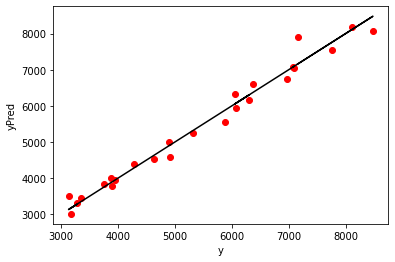

In [558]:
plt.scatter(y, yPred, color='red')
plt.plot(y,y, color='black')
plt.xlabel('y')
plt.ylabel('yPred')

In [559]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
COPPERPRICE,1.0,3.002122e+07,3.002122e+07,392.245413,3.804745e-14
INCOMEINDEX,1.0,3.397231e+07,3.397231e+07,443.868829,1.234186e-14
ALUMPRICE,1.0,5.534683e+05,5.534683e+05,7.231400,1.452587e-02
INVENTORYINDEX,1.0,2.521226e+03,2.521226e+03,0.032941,8.578993e-01
TIME,1.0,9.001430e+05,9.001430e+05,11.760915,2.810953e-03
Residual,19.0,1.454200e+06,7.653682e+04,NaN,NaN


If the OLS result is examined,
* R2 and adjusted R2 values for the established regression model are at the level of 0.97. In this respect, it can be said that it is a consistent regression model.
* If the model result is examined, COPPERPROCE has a low coefficient and standard error. In this respect, it seems to be a variable that can be removed from the model. However, when the ANOVA table is examined, it is seen that all coefficients have high values to the mean. In this respect, it may be good to keep all variables in the model.
* If F and p values are examined from the ANOVA table, the INVENTORYINDEX variable has a lower effect on the variance in the result compared to other variables. From this point of view, it seems to be removable from the model.

## REFERENCE
1. [World Copper Market 1951-1975 Dataset](https://www.statsmodels.org/dev/datasets/generated/copper.html)

## Question 2

Do the same for the following [dataset](https://archive.ics.uci.edu/ml/datasets/QSAR+fish+toxicity). The first 5 columns are the explanatory variables while the last column is the target variable.

In [471]:
fish = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00504/qsar_fish_toxicity.csv',
                   sep=';',
                   header=None)

fish.columns = ['CIC0', 'SM1_Dz', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP','LC50']
fish

,CIC0,SM1_Dz,GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390
...,...,...,...,...,...,...,...
903,2.801,0.728,2.226,0,2,0.736,3.109
904,3.652,0.872,0.867,2,3,3.983,4.040
905,3.763,0.916,0.878,0,6,2.918,4.818
906,2.831,1.393,1.077,0,1,0.906,5.317


# Answer 2,

In [592]:
print(type(fish))

<class 'pandas.core.frame.DataFrame'>


First, let's assign the explanatory and target variables to a variable.

In [593]:
X = fish.take([0,1,2,3,4,5], axis=1)
y = fish.take([6], axis=1)

Ordinary least square regression using statsmodels python package,

In [594]:
model = sm.OLS(y, X).fit()#fit_regularized(alpha=0.2, L1_wt=0.5)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   LC50   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              2549.
Date:                Tue, 29 Mar 2022   Prob (F-statistic):                        0.00
Time:                        22:31:25   Log-Likelihood:                         -1305.4
No. Observations:                 908   AIC:                                      2623.
Df Residuals:                     902   BIC:                                      2652.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

* If the coefficients are to be examined, all the coefficients are large enough. Therefore, all variables can be included in the model.
* However, if the p values are examined, the 2nd and 4th variables are P>|t| values are greater than 0.05. In this respect, it can be said that the 2nd and 4th variables have less effect on the model. Therefore, the 2nd and 4th variables can be removed from the model.

If the 2nd and 4th variables are removed from the model and the regression model is established,

In [595]:
X_new = fish.take([0,1,3,5], axis=1)
y = fish.take([6], axis=1)

In [596]:
model = sm.OLS(y, X_new).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   LC50   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              3817.
Date:                Tue, 29 Mar 2022   Prob (F-statistic):                        0.00
Time:                        22:31:49   Log-Likelihood:                         -1307.0
No. Observations:                 908   AIC:                                      2622.
Df Residuals:                     904   BIC:                                      2641.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

If the p values in the new regression model are examined, the p value for all variables is less than 0.05. In this respect, all variables in the model are important and should be included in the model. If the R2 and adjusted R2 values of the two models are examined, these metrics have remained constant.

if we reconstruct the OLS model with intercept term

In [597]:
model = ols('LC50 ~ CIC0 + SM1_Dz + GATS1i + NdsCH + NdssC+ MLOGP ', fish).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   LC50   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     205.0
Date:                Tue, 29 Mar 2022   Prob (F-statistic):          1.33e-164
Time:                        22:31:51   Log-Likelihood:                -1238.0
No. Observations:                 908   AIC:                             2490.
Df Residuals:                     901   BIC:                             2524.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1746      0.181     12.000      0.000       1.819       2.530
CIC0           0.3856      0.061      6.333      0.000       0.266       0.505
SM1_Dz         1.2556      0.087     14.430      0.000       1.085       1.426
GATS1i        -0.7464      0.101     -7.365      0.000      -0.945      -0.548
NdsCH          0.4136      0.054      7.644      0.000       0.307       0.520
NdssC          0.0643      0.041      1.583      0.114      -0.015       0.144
MLOGP          0.3901      0.034     11.555      0.000       0.324       0.456
==============================================================================
Omnibus:                      100.278   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              379.239
Skew:                           0.468   Prob(JB):                     4.46e-83
Kurtosis:                       6.024   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [598]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
CIC0,1.0,163.712676,163.712676,181.503320,7.998728e-38
SM1_Dz,1.0,467.982290,467.982290,518.837891,4.593942e-91
GATS1i,1.0,294.541130,294.541130,326.548893,1.593033e-62
NdsCH,1.0,62.219362,62.219362,68.980736,3.623619e-16
NdssC,1.0,0.421449,0.421449,0.467247,4.944319e-01
MLOGP,1.0,120.423145,120.423145,133.509520,6.784391e-29
Residual,901.0,812.685523,0.901982,NaN,NaN


If the newly established model is to be examined, the p value of the NdssC variable is greater than 0.05. In this respect, this term can be deleted from the model. Looking at the ANOVA table, the sum_sq and mean_sq values of the NdssC value are lower than the other variables. In this respect, it is seen that the effect of this variable on the result is quite low.

## KNN model

In [599]:
fish.describe()

,CIC0,SM1_Dz,GATS1i,NdsCH,NdssC,MLOGP,LC50
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.898129,0.628468,1.293591,0.229075,0.485683,2.109285,4.064431
std,0.756088,0.428459,0.394303,0.605335,0.861279,1.433181,1.455698
min,0.667000,0.000000,0.396000,0.000000,0.000000,-2.884000,0.053000
25%,2.347000,0.223000,0.950750,0.000000,0.000000,1.209000,3.151750
50%,2.934000,0.570000,1.240500,0.000000,0.000000,2.127000,3.987500
75%,3.407000,0.892750,1.562250,0.000000,1.000000,3.105000,4.907500
max,5.926000,2.171000,2.920000,4.000000,6.000000,6.515000,9.612000


In [600]:
fish.corr()

,CIC0,SM1_Dz,GATS1i,NdsCH,NdssC,MLOGP,LC50
CIC0,1.000000,-0.235360,0.147622,0.121341,0.246639,0.463867,0.291854
SM1_Dz,-0.235360,1.000000,-0.145967,-0.141401,0.163179,0.200663,0.410893
GATS1i,0.147622,-0.145967,1.000000,-0.010657,0.092410,-0.450739,-0.397965
NdsCH,0.121341,-0.141401,-0.010657,1.000000,0.188164,0.048620,0.172004
NdssC,0.246639,0.163179,0.092410,0.188164,1.000000,0.028499,0.172390
MLOGP,0.463867,0.200663,-0.450739,0.048620,0.028499,1.000000,0.651664
LC50,0.291854,0.410893,-0.397965,0.172004,0.172390,0.651664,1.000000


In [601]:
x = fish.iloc[:, 0:6]
y = fish.iloc[:, 6:7]

In [602]:
from sklearn.preprocessing import StandardScaler
# Scales the independent variables
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [603]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor().fit(x,y)
knn_TrnPred = knn.predict(x)

In [604]:
knnR2 = knn.score(x,y)

In [605]:
knnR2

0.7585145864325094

## Question 3

Develop a sensible regression model for the following [dataset](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized):


In [790]:
interconnections = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/00211/CommViolPredUnnormalizedData.txt',
                               sep=',',
                               header=None)
interconnections

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,Mercedcity,CA,?,?,10,56216,3.07,6.87,61.68,15.23,...,1376,2268.72,2563,4225.82,489,806.25,34,56.06,545.75,7356.84
2211,Pinevillecity,LA,?,?,10,12251,2.68,21.18,76.65,1.52,...,104,860.43,574,4748.9,24,198.56,2,16.55,124.1,5824.44
2212,Yucaipacity,CA,?,?,10,32824,2.46,0.52,92.62,0.98,...,628,1709.26,895,2435.97,179,487.19,8,21.77,353.83,4654.2
2213,Beevillecity,TX,?,?,10,13547,2.89,3.37,69.91,0.90,...,192,1508.01,474,3722.9,13,102.1,1,7.85,691.17,5340.87


There are 16 possible response variables. You may choose any one of these as the response variable.

* murders: number of murders in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted)
* murdPerPop: number of murders per 100K population (numeric - decimal) potential GOAL attribute (to be predicted)
* rapes: number of rapes in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted)
* rapesPerPop: number of rapes per 100K population (numeric - decimal) potential GOAL attribute (to be predicted)
* robberies: number of robberies in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted)
* robbbPerPop: number of robberies per 100K population (numeric - decimal) potential GOAL attribute (to be predicted)
* assaults: number of assaults in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted)
* assaultPerPop: number of assaults per 100K population (numeric - decimal) potential GOAL attribute (to be predicted)
* burglaries: number of burglaries in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted)
* burglPerPop: number of burglaries per 100K population (numeric - decimal) potential GOAL attribute (to be predicted)
* larcenies: number of larcenies in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted)
* larcPerPop: number of larcenies per 100K population (numeric - decimal) potential GOAL attribute (to be predicted)
* autoTheft: number of auto thefts in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted)
* autoTheftPerPop: number of auto thefts per 100K population (numeric - decimal) potential GOAL attribute (to be predicted)
* arsons: number of arsons in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted)
* arsonsPerPop: number of arsons per 100K population (numeric - decimal) potential GOAL attribute (to be predicted)
* ViolentCrimesPerPop: total number of violent crimes per 100K popuation (numeric - decimal) GOAL attribute (to be predicted)
* nonViolPerPop: total number of non-violent crimes per 100K popuation (numeric - decimal) potential GOAL attribute (to be predicted)


# Answer 3,

First 4 columns are non-predictive variable. For this reason, drop first non-predictive variables,

In [791]:
data = interconnections[interconnections.columns[5:]]

Assign NAN to unknown values

In [792]:
data = data.replace('?', np.nan)
missingValuesInd = data.columns[data.isnull().any()]

In [793]:
data[missingValuesInd].describe()

,30,103,104,105,106,107,108,109,110,111,...,137,138,139,140,141,142,143,144,145,146
count,2214,343,343,343,343,343,343,343,343,343,...,2212,2212,2212,2212,2212,2212,2124,2124,1994,2118
unique,1917,220,343,215,342,319,343,336,322,317,...,909,2199,1454,2211,648,2172,178,1577,1973,2113
top,0,100,262.48,94,183.22,50000,96093.9,367,153,100,...,79,718.47,467,4631.1,16,213.62,0,0,223.06,2246.14
freq,140,6,1,8,2,4,1,2,2,7,...,15,2,6,2,28,3,323,323,3,2


Assign mean value instead of unknown values

In [794]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [795]:
imp = imp.fit(data[missingValuesInd])

In [796]:
data[missingValuesInd] = imp.transform(data[missingValuesInd])

In [797]:
data[missingValuesInd].describe()

,30,103,104,105,106,107,108,109,110,111,...,137,138,139,140,141,142,143,144,145,146
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2.215000e+03,2.215000e+03,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,9442.765131,499.198251,246.490962,432.559767,210.844781,2.524050e+05,1.206517e+05,523.658309,246.493586,85.499679,...,761.236890,1033.430203,2137.629295,3372.979150,516.692586,473.965628,30.907721,32.153682,589.078922,4908.241804
std,7924.676433,660.866822,107.610924,587.070237,92.549928,2.709735e+05,5.825131e+04,120.989559,107.610628,4.300249,...,3109.593841,762.837088,7595.422279,1900.027554,3255.956067,504.323995,176.384647,38.425998,583.294342,2679.020528
min,0.000000,65.000000,29.400000,14.000000,19.210000,2.100000e+03,2.704800e+03,20.800000,29.400000,42.150000,...,2.000000,16.920000,10.000000,77.860000,1.000000,6.550000,0.000000,0.000000,0.000000,116.790000
25%,5528.500000,499.198251,246.490962,432.559767,210.844781,2.524050e+05,1.206517e+05,523.658309,246.493586,85.499679,...,95.000000,512.185000,392.500000,2040.740000,30.000000,157.060000,1.000000,7.985000,185.280000,2994.265000
50%,8187.000000,499.198251,246.490962,432.559767,210.844781,2.524050e+05,1.206517e+05,523.658309,246.493586,85.499679,...,205.000000,823.710000,748.000000,3081.630000,75.000000,303.200000,6.000000,22.380000,445.940000,4576.610000
75%,11525.000000,499.198251,246.490962,432.559767,210.844781,2.524050e+05,1.206517e+05,523.658309,246.493586,85.499679,...,511.500000,1348.670000,1676.500000,4334.675000,234.000000,589.225000,18.000000,41.435000,722.000000,6100.870000
max,137000.000000,25655.000000,3437.230000,22496.000000,3290.620000,8.328470e+06,1.926282e+06,2162.500000,3437.200000,100.000000,...,99207.000000,11881.020000,235132.000000,25910.550000,112464.000000,4968.590000,5119.000000,436.370000,4877.060000,27119.760000


In [798]:
data = data.dropna(axis=1)
print(data.shape)
data.head()

(2215, 142)


,5,6,7,8,9,10,11,12,13,14,...,137,138,139,140,141,142,143,144,145,146
0,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.000000,16.410000,41.020000,1394.590000
1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.000000,4.250000,127.560000,1955.950000
2,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.000000,60.870000,218.590000,6167.510000
3,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,...,225.0,1301.78,716.0,4142.56,47.0,271.93,30.907721,32.153682,306.640000,4908.241804
4,11245,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,12.65,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.000000,40.050000,589.078922,9988.790000


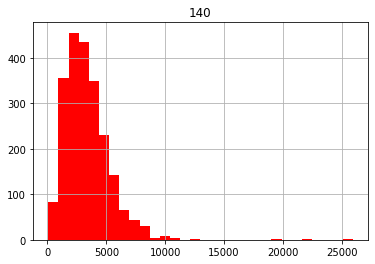

In [799]:
data.hist(column = [140], bins = 30, color = 'red')
plt.show()

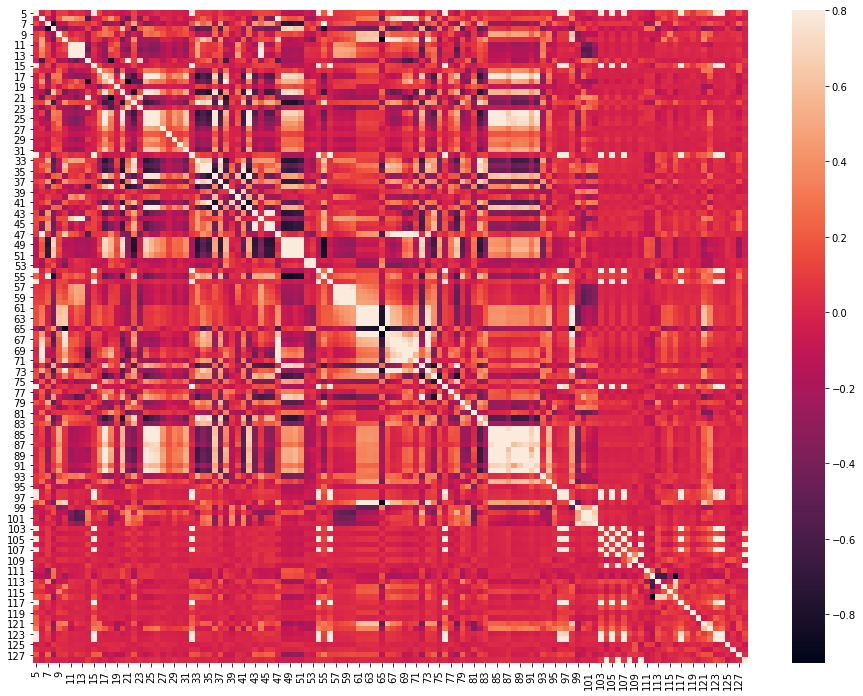

In [800]:
X = data[data.columns[0:-18]]
Yall = data[data.columns[-18:]]
Y = data[data.columns[140]]

import seaborn as sns

corrmat = X.corr()
fig = plt.figure(figsize = (16, 12))

sns.heatmap(corrmat, vmax = 0.8)
plt.show()

Convert from dataframe to numpy array

In [801]:
X =X.to_numpy()

In [802]:
Y = Y.to_numpy()

Calculate correlation between input parameters and output

In [806]:
def pearsonCorrelation_withOutput(X, y):
    _,d = X.shape
    corr = np.empty((d,1))
    yNorm = y-np.mean(y)
    yStd = np.std(y)

    for i in range(d):
        current = X[:,i]
        corr[i] = np.mean(np.multiply(current-np.mean(current), yNorm))/(np.std(current)*yStd)
        
    return corr

In [807]:
p_corr = pearsonCorrelation_withOutput(X, Y)

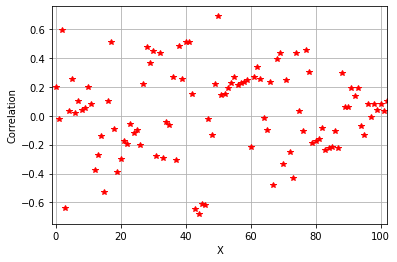

In [808]:
plt.plot(p_corr, "*", color='red')
plt.xlabel("X")
plt.xlim(-1,102)
plt.ylabel("Correlation")
plt.grid()

It can be seen from the results that the number of variables with a correlation value close to 0 is very few. The parameters with a correlation value close to 0 can be removed from the model and a regression model can be established.

In [809]:
model1 = LinearRegression()
model1.fit(X,Y)
1.0 - model1.score(X,Y)

0.3730855334171621

Ridge, Lasso, ElasticNet regression,

In [810]:
model2 = Ridge()
model2.fit(X,Y)
1.0 - model2.score(X,Y)

C:\Users\sihme\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.35345e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


0.37341683722606445

In [811]:
model3 = Lasso()
model3.fit(X,Y)
1.0 - model3.score(X,Y)

C:\Users\sihme\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143642938.83367866, tolerance: 75327.42877211818
  model = cd_fast.enet_coordinate_descent(


0.3771999978918683

In [812]:
model4 = ElasticNet()
model4.fit(X,Y)
1.0 - model4.score(X,Y)

C:\Users\sihme\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146237774.55143797, tolerance: 75327.42877211818
  model = cd_fast.enet_coordinate_descent(


0.38190602250837236

In [813]:
model5 = sm.OLS(Y, X).fit()
print(model5.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.815
Model:                            OLS   Adj. R-squared (uncentered):              0.804
Method:                 Least Squares   F-statistic:                              75.63
Date:                Tue, 29 Mar 2022   Prob (F-statistic):                        0.00
Time:                        23:28:05   Log-Likelihood:                         -16159.
No. Observations:                2215   AIC:                                  3.256e+04
Df Residuals:                    2093   BIC:                                  3.326e+04
Df Model:                         122                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------